<a href="https://colab.research.google.com/github/EmilSeyfullayev/Bank_Loan_Default_prediction/blob/master/in_Python/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling/df.csv')

In [ ]:
df.drop(['Unnamed: 0', 'ID'], inplace=True, axis=1)

In [ ]:
names = df.columns

In [ ]:
df.shape

(465839, 35)

In [ ]:
l = []

for i in names:
   l.append(df[i].value_counts().shape[0])

In [ ]:
val_count = pd.concat([pd.Series(names), pd.Series(l)], axis=1)

In [ ]:
val_count = val_count.sort_values(by=[1]).reset_index(drop=True)

In [ ]:
val_count

,0,1
0,tot_coll_amt,2
1,out_prncp_inv,2
2,term,2
3,out_prncp,2
4,initial_list_status,2
5,pymnt_plan,2
6,loan_status,2
7,verification_status,3
8,inq_last_6mths,4
9,home_ownership,4


In [ ]:
 val_count.iloc[:,0][7:17].values

array(['verification_status', 'inq_last_6mths', 'home_ownership',
       'zip_class', 'grade', 'emp_length', 'purpose', 'open_acc',
       'sub_grade', 'addr_state'], dtype=object)

In [ ]:
#We will convert to dummies [7-17] variables #not binary categorical, nor numeric
to_dummies = val_count.iloc[:,0][7:17].values

In [ ]:
dummy_frame = pd.get_dummies(df[to_dummies], drop_first=True)

In [ ]:
dummy_frame.shape

(465839, 118)

In [ ]:
val_count.iloc[:,0][0:7].values #df1

array(['tot_coll_amt', 'out_prncp_inv', 'term', 'out_prncp',
       'initial_list_status', 'pymnt_plan', 'loan_status'], dtype=object)

In [ ]:
val_count.iloc[:,0][17:].values#df2

array(['total_acc', 'Months_past_first_cr', 'int_rate', 'revol_util',
       'loan_amnt', 'funded_amnt', 'dti', 'funded_amnt_inv',
       'total_rev_hi_lim', 'annual_inc', 'revol_bal', 'installment',
       'last_pymnt_amnt', 'total_rec_prncp', 'tot_cur_bal',
       'total_rec_int', 'total_pymnt', 'total_pymnt_inv'], dtype=object)

In [ ]:
#from 7 to 10 we have dummy variables
df1 = df[val_count.iloc[:,0][0:7].values]
df2 = df[val_count.iloc[:,0][17:].values]
df3 = dummy_frame

In [ ]:
final_data = pd.concat([df1, df2, df3], axis=1)

In [ ]:
final_data.shape

(465839, 136)

In [ ]:
final_data.to_csv("/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling.df_with_dummies.csv")

In [ ]:
chpoint_1 = df

In [ ]:
df = final_data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df.drop(['initial_list_status'], axis=1, inplace=True)
#this variable was not converted to dummy
y = df['loan_status']
X = df.drop(['loan_status'], axis=1)

In [ ]:
#save file to drive
df.to_csv('/content/drive/My Drive/Colab Notebooks/Credit Risk Modeling/df_with_dummies.csv')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.17      0.29     10786
           1       0.90      0.99      0.95     82382

    accuracy                           0.90     93168
   macro avg       0.84      0.58      0.62     93168
weighted avg       0.89      0.90      0.87     93168



In [ ]:
#In R we had more accuracy score
#Let's check accuracy for train
predictions_train = model.predict(X_train)
print(classification_report(y_train, predictions_train))
#So, there is no overfitting, uderfitting
#both accuracy score are 90%
#but f1 scores are very bad for 0

              precision    recall  f1-score   support

           0       0.78      0.17      0.28     42976
           1       0.90      0.99      0.95    329695

    accuracy                           0.90    372671
   macro avg       0.84      0.58      0.61    372671
weighted avg       0.89      0.90      0.87    372671



In [ ]:
from sklearn.metrics import plot_roc_curve

<Figure size 720x720 with 0 Axes>

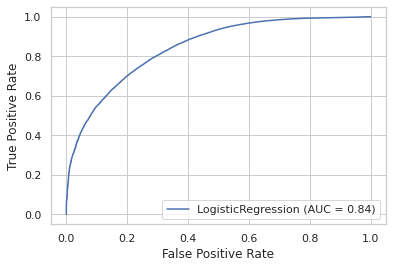

In [ ]:
print(plot_roc_curve(model, X_test, y_test))
#AUC = 0.84

In [ ]:
#Accuracy score for test set
model.score(X_test, y_test)

0.8989567233384853

In [ ]:
#Accuracy score for train set
model.score(X_train, y_train)

0.8986827523472446

In [ ]:
model.coef_

array([[ 9.61732022e-04, -1.38661322e-05,  1.48699549e-05,
        -3.05864563e-05,  2.84943010e-04,  2.99327336e-05,
         4.82484126e-05,  4.82484126e-05, -9.93859187e-04,
         3.72994223e-04,  9.21304110e-04,  6.10420754e-04,
         3.57385203e-04,  3.40672691e-06,  1.45077600e-06,
         1.43588310e-05,  1.35241633e-05,  3.40672691e-06,
         4.82484126e-05,  4.82484126e-05, -1.38661322e-05,
         1.35241633e-05,  3.09062859e-05,  1.48699549e-05,
         4.14452678e-06,  1.14819185e-05, -5.83326337e-09,
         4.56908130e-06, -5.79685545e-06, -7.42677981e-08,
         1.33731376e-06,  2.93526282e-06,  2.10069521e-06,
         3.65696209e-07, -1.56965352e-06, -2.04494590e-07,
         2.82018305e-07, -6.07261945e-08,  3.07161825e-06,
        -8.18820596e-07, -1.28957420e-07,  6.00103880e-07,
        -1.83511683e-07,  6.33124461e-07,  3.06753725e-07,
         1.82990301e-07,  1.19728819e-06,  4.62022911e-09,
        -1.06981847e-06,  3.97263991e-07, -1.03052738e-0